In [1]:
import pandas as pd
import numpy as np
from custom import Perform_EDA as EDA
from sklearn.tree import DecisionTreeClassifier
from custom import Build_Model as Build_Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from feature_selection_ga import FeatureSelectionGA
np.random.seed(1234)
from sklearn import metrics
import os

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
dataset = pd.read_csv("modiasd.csv")

In [3]:
dataset_1 = dataset.drop([
    "Before speech loss (SL)",
    "Obstetric risk factors ? 3 (in 90 ADSL)",
    "Psychosocial event before SL (S1=1,S2=2,S3=3,S4=4)",
    "During SL (for 6 months or less after onset)(D1=2,D2=4,D3=6))",
    "Epilepsy (L-1;M-2;H-3)",
    "Epileptic EEG abnormality (in 7 CDD and 82 ADSL)",
    "Mutism (SL-1;SL-2;SL-3)",
    "Having a first-degree relative with a developmental disorder",
    "15 items (score ? 2)(Y-1;N-0)",
    "1. Relationships with people",
    "2. Imitation",
    "3. Emotion",
    "4. Use of body (stereotypy)",
    "5. Relation to nonhuman objects (inappropriate interest in or use of objects)",
    "6. Adaptation to environmental change",
    "7. Visual responsiveness",
    "8. Auditory responsiveness",
    "9. Near receptor responsiveness",
    "10. Anxiety",
    "11. Verbal communication",
    "12. Nonverbal communication",
    "13. Activity level",
    "14. Intellectual functioning (uneven intellectual profile)",
    "15. General impressions",
    "Restlessness",    
], axis=1)
dataset_1.rename(columns={"class": "Target"}, inplace=True)
dataset_1.iloc[112]
dataset_1.drop(112, inplace=True)
dataset_1.reset_index(drop=True, inplace=True)

In [4]:
dataset_1.to_csv("dataset_1.csv", index=False)
dataset_1 = pd.read_csv("dataset_1.csv")

In [5]:
dataset_1.head()

,verbal (1)/non-verbal communication(0),stereotyped behaviors,Lack of empathy(L-1:M-2:H-3),adaptive behaviors,Head-growth decelerations,interact with other people,Fearfulness,At first visit (Fear-1;Less Fear-0),understand gestures such as waving,Severe intellectual disability (IQ < 35),...,Vision (Movement) - Sense - Over-Sensitive,Vision (Movement) - Sense - Under-Sensitive,Low Tech/No Tech Adaptations for the Visual Environment - -Reduce bright lighting,Low Tech/No Tech Adaptations for the Visual Environment-Decrease clutter,Low Tech/No Tech Adaptations for the Auditory Environment,Low Tech/No Tech Adaptations for the Vestibular (movement/balance) Environment,Low Tech/No Tech Adaptations for the Proprioceptive (body position) Environment,Change routine,notmoveindepe,Target
0,0,0,3,1,0,0,1,1,0,35,...,0,1,1,1,0,0,0,1,1,1.0
1,0,0,2,1,1,0,1,1,1,40,...,0,1,0,1,0,0,0,1,0,1.0
2,1,0,2,1,0,1,1,1,0,38,...,1,1,1,0,1,1,1,1,0,1.0
3,0,0,1,1,0,0,0,0,1,35,...,0,0,1,1,0,0,0,0,0,1.0
4,0,0,2,0,1,0,1,1,1,35,...,0,1,1,1,0,0,0,1,1,1.0


In [6]:
Y = dataset_1["Target"]

In [7]:
dataset_1.columns

Index(['verbal (1)/non-verbal communication(0)', 'stereotyped behaviors',
       'Lack of empathy(L-1:M-2:H-3)', 'adaptive behaviors',
       'Head-growth decelerations', 'interact with other people',
       'Fearfulness', 'At first visit (Fear-1;Less Fear-0)',
       'understand gestures such as waving',
       'Severe intellectual disability (IQ < 35)',
       'Childhood Autism Rating Scale-Tokyo Version (L=1;M=2;H=3)',
       'Total score ? 30', 'Routines or repetitive behaviors',
       'repeating words', 'repeating actions over and over',
       'obsessively following routines', 'schedules for their actions',
       'want to have routines where things stay the same so they know what to expect.',
       'Increase sensorimotor skills', 'Are behaviors linked?',
       'Do they occur in response to the same situation?',
       'Do they occur in a predictable pattern?',
       'What activity or event preceded the behavior?',
       'Environmental factors impact behavior?',
       'Warn

In [8]:
X = dataset_1[[
    'verbal (1)/non-verbal communication(0)', 'stereotyped behaviors',
       'Lack of empathy(L-1:M-2:H-3)', 'adaptive behaviors',
       'Head-growth decelerations', 'interact with other people',
       'Fearfulness', 'At first visit (Fear-1;Less Fear-0)',
       'understand gestures such as waving',
       'Severe intellectual disability (IQ < 35)',
       'Childhood Autism Rating Scale-Tokyo Version (L=1;M=2;H=3)',
       'Total score ? 30', 'Routines or repetitive behaviors',
       'repeating words', 'repeating actions over and over',
       'obsessively following routines', 'schedules for their actions',
       'want to have routines where things stay the same so they know what to expect.',
       'Increase sensorimotor skills', 'Are behaviors linked?',
       'Do they occur in response to the same situation?',
       'Do they occur in a predictable pattern?',
       'What activity or event preceded the behavior?',
       'Environmental factors impact behavior?',
       'Warning signs or predictors of the behavior', 'Eye aversion',
       'Distractibility', 'Pause', 'Louder voice', 'Hand flapping',
       'Vision (sight) - Sense - Over-Sensitive',
       'Vision (sight) - Sense - Under-Sensitive',
       'Vision (Sound) - Sense - Over-Sensitive',
       'Vision (Sound) - Sense - Under-Sensitive',
       'Vision (Smell) - Sense - Over-Sensitive',
       'Vision (Smell) - Sense - Under-Sensitive',
       'Vision (Touch (Tactile)) - Sense - Over-Sensitive',
       'Vision (Touch (Tactile)) - Sense - Under-Sensitive',
       'Vision (Taste) - Sense - Over-Sensitive',
       'Vision (Taste) - Sense - Under-Sensitive',
       'Vision (Movement) - Sense - Over-Sensitive',
       'Vision (Movement) - Sense - Under-Sensitive',
       'Low Tech/No Tech Adaptations for the Visual Environment - -Reduce bright lighting',
       'Low Tech/No Tech Adaptations for the Visual Environment-Decrease clutter',
       'Low Tech/No Tech Adaptations for the Auditory Environment',
       'Low Tech/No Tech Adaptations for the Vestibular (movement/balance) Environment',
       'Low Tech/No Tech Adaptations for the Proprioceptive (body position) Environment',
       'Change routine', 'notmoveindepe'
]]

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=100)

In [10]:
target_names = ['Yes','No']

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=3, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
                                                         Imp
verbal (1)/non-verbal communication(0)              0.000000
stereotyped behaviors                               0.000000
Lack of empathy(L-1:M-2:H-3)                        0.000000
adaptive behaviors                                  0.000000
Head-growth decelerations                           0.000000
interact with other people                          0.000000
Fearfulness                                         0.000000
At first visit (Fear-1;Less Fear-0)                 0.000000
understand gestures such as waving                  0.000000
Severe intellectual disability (IQ < 35)            0.000000
Childhood Autism Rat

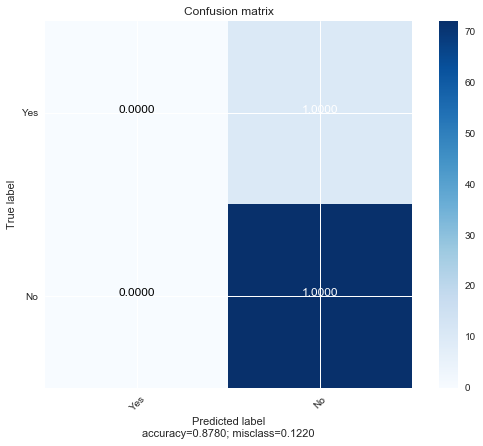

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        10
        1.0       0.88      1.00      0.94        72

avg / total       0.77      0.88      0.82        82



In [11]:
D,L,Param,DT_Reg_Model = Build_Model.GS_DT(X_train,X_test,Y_train,Y_test,max_depth_start=4, max_depth_end=10, max_depth_jump=1,max_leaf_nodes_start=3,max_leaf_nodes_end=20,max_leaf_nodes_jump=1,cv_count=10,target_names=target_names)

In [15]:
DT_Predictions = DT_Reg_Model.predict(X_test)
DT_Predictions

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

In [16]:
DT_AUC = roc_auc
DT_AUC

NameError: name 'roc_auc' is not defined

In [17]:
fsga = FeatureSelectionGA(DT_Reg_Model,X_train.values,Y_train.values)
pop = fsga.generate(n_pop=275,ngen=10)

EVOLVING.......
-- GENERATION 1 --
Evaluated 179 individuals
-- GENERATION 2 --
Evaluated 157 individuals
-- GENERATION 3 --
Evaluated 169 individuals
-- GENERATION 4 --
Evaluated 140 individuals
-- GENERATION 5 --
Evaluated 175 individuals
-- GENERATION 6 --
Evaluated 173 individuals
-- GENERATION 7 --
Evaluated 173 individuals
-- GENERATION 8 --
Evaluated 186 individuals
-- GENERATION 9 --
Evaluated 150 individuals
-- GENERATION 10 --
Evaluated 151 individuals
-- Only the fittest survives --
Best individual is [1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1], (0.964769647696477,)


In [18]:
te = [0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1]
print(len(t))
print(t.count(1))

NameError: name 't' is not defined

In [81]:
X_new_pop = pd.DataFrame(np.asarray(pop, dtype=np.int32))
X_new_pop.columns

RangeIndex(start=0, stop=49, step=1)

In [82]:
DT_Reg_Model.predict(X_test)

ValueError: Number of features of the model must match the input. Model n_features is 20 and input n_features is 49 